In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Configurações de visualização
%matplotlib inline
sns.set(style="whitegrid")

# Carregamento dos dados
dataset = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Visualização inicial dos dados
print("Primeiros registros do dataset:")
display(dataset.head())

Primeiros registros do dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print("Informações do dataset:")
display(dataset.info())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

None

**customerID**: Identificador único para cada cliente.

**gender**: Gênero do cliente (masculino ou feminino).

**SeniorCitizen**: Indica se o cliente é um idoso (1) ou não (0).

**Partner**: Indica se o cliente tem um parceiro (Sim) ou não (Não).

**Dependents**: Indica se o cliente tem dependentes (Sim) ou não (Não).

**tenure**: Número de meses que o cliente permaneceu com a empresa.

**PhoneService**: Indica se o cliente tem um serviço telefônico (Sim) ou não (Não).

**MultipleLines**: Indica se o cliente tem múltiplas linhas telefônicas (Sim, Não, Sem serviço telefônico).

**InternetService**: Tipo de serviço de internet do cliente (DSL, Fibra óptica, Não).

**OnlineSecurity**: Indica se o cliente tem segurança online adicionada ao seu serviço de internet (Sim, Não, Sem internet).

**OnlineBackup**: Indica se o cliente tem backup online (Sim, Não, Sem internet).

**DeviceProtection**: Indica se o cliente tem proteção no dispositivo (Sim, Não, Sem internet).

**TechSupport**: Indica se o cliente tem suporte técnico (Sim, Não, Sem internet).

**StreamingTV**: Indica se o cliente tem serviço de streaming de TV (Sim, Não, Sem internet).

**StreamingMovies**: Indica se o cliente tem serviço de streaming de filmes (Sim, Não, Sem internet).

**Contract**: Tipo de contrato do cliente (Mensal, Um ano, Dois anos).

**PaperlessBilling**: Indica se o cliente optou por faturamento sem papel (Sim) ou não (Não).

**PaymentMethod**: Método de pagamento do cliente (transferência eletrônica, cartão de crédito, cheque eletrônico, cheque enviado).

**MonthlyCharges**: A quantia cobrada do cliente mensalmente.

**TotalCharges**: A quantia total cobrada do cliente.

**Churn**: Indica se o cliente deixou a empresa (Sim) ou não (Não).

# EDA

Identificar os Fatores de Churn: Compreender quais características ou comportamentos dos clientes estão mais associados ao risco de eles cancelarem seus serviços.

In [45]:
# Paleta de cores pastel
sns.set_palette('Paired')

# Print da paleta de cores
print("Paleta de cores:")
display(sns.color_palette())

Paleta de cores:


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

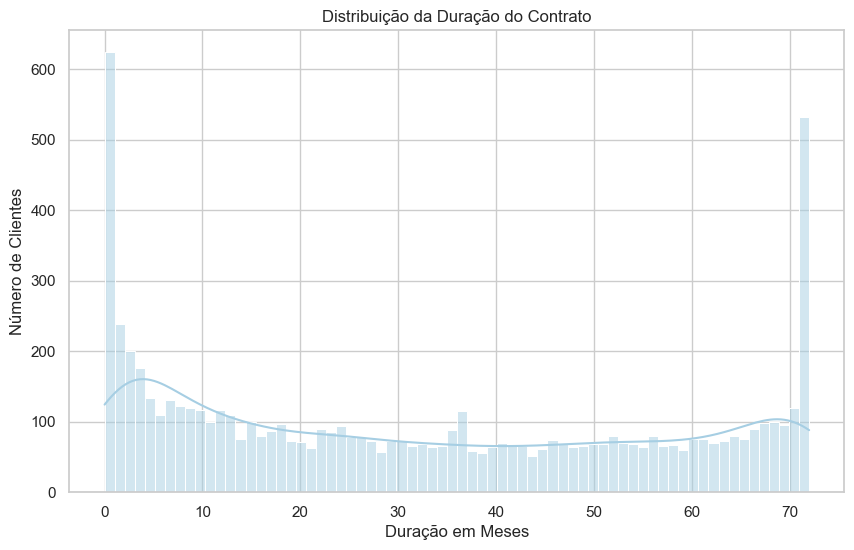

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['tenure'], bins=70, kde=True)
plt.title('Distribuição da Duração do Contrato')
plt.xlabel('Duração em Meses')
plt.ylabel('Número de Clientes')
plt.show()

Podemos observar que muitos clientes costumar cancelar o contrato logo no primeiro mês, após o pico inicial, há uma queda acentuada no número de clientes conforme a duração do contrato aumenta. Observa-se outro pico significativo em torno dos 70 meses. Esse pico pode indicar a existência de contratos de longo prazo que chegam ao fim ou renovam-se nesse período específico, ou ainda, um número significativo de clientes fiéis que continuam com o serviço por muitos anos.

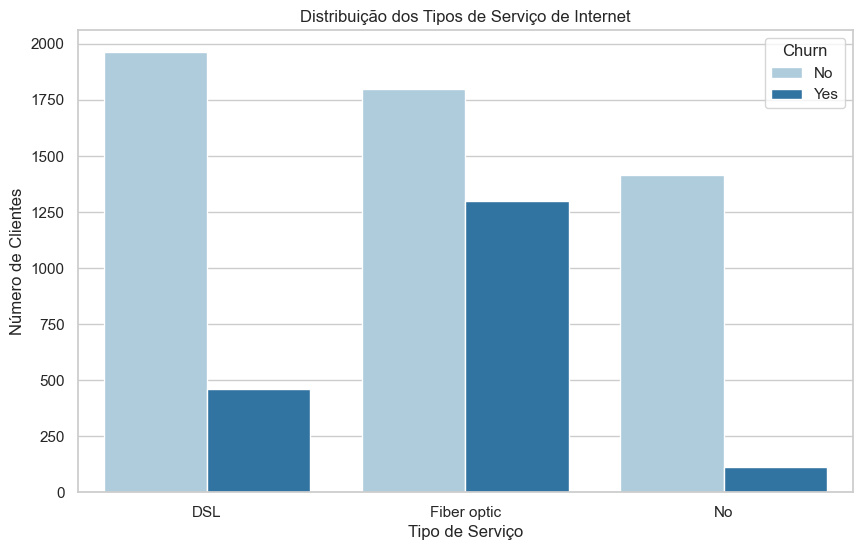

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição dos Tipos de Serviço de Internet')
plt.xlabel('Tipo de Serviço')
plt.ylabel('Número de Clientes')
plt.show()

Embora ambos os serviços (DSL e Fiber optic) tenham um número semelhante de clientes que não cancelaram, a fibra óptica apresenta uma taxa de cancelamento mais alta. Isso pode sugerir que, apesar da fibra óptica oferecer melhor desempenho, pode haver problemas com a satisfação do cliente ou com o custo, levando a um maior cancelamento.

O alto número de clientes sem serviço de internet, combinado com a baixa taxa de cancelamento, pode indicar que esses clientes estão satisfeitos com outros serviços da empresa. Pode também representar uma oportunidade para a empresa converter esses clientes em assinantes de internet, oferecendo pacotes atrativos.

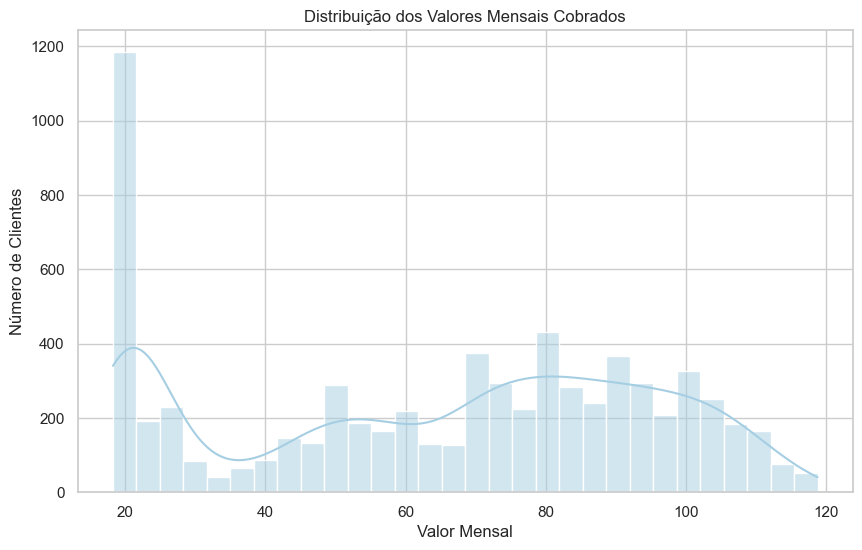

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribuição dos Valores Mensais Cobrados')
plt.xlabel('Valor Mensal')
plt.ylabel('Número de Clientes')
plt.show()

Há um pico muito alto na faixa de valores mensais em torno de $20. Isso indica que um grande número de clientes está pagando valores mensais baixos, o que pode indicar que eles estão utilizando apenas um serviço básico ou um pacote de serviços limitado.

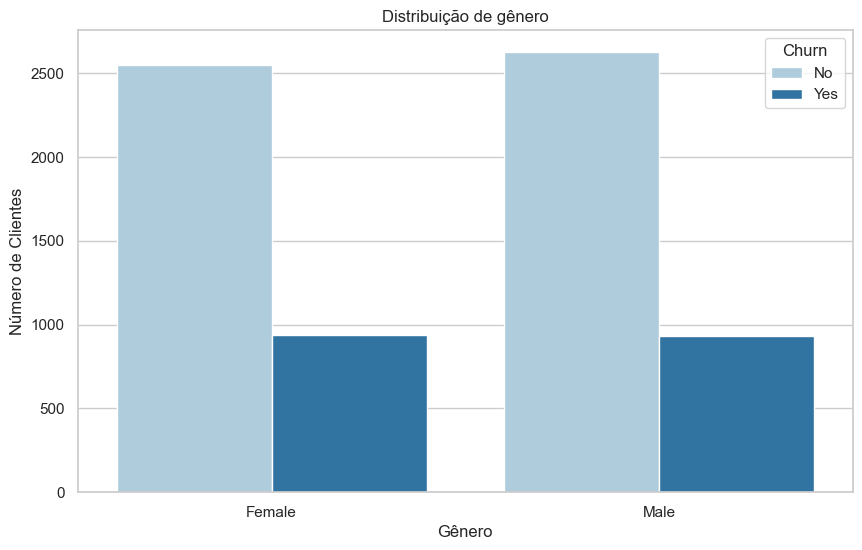

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.show()

O gráfico mostra que a distribuição de churn é bastante semelhante entre clientes femininos e masculinos. Tanto a quantidade de clientes que não cancelaram quanto a quantidade de clientes que cancelaram são praticamente iguais entre os dois gêneros.


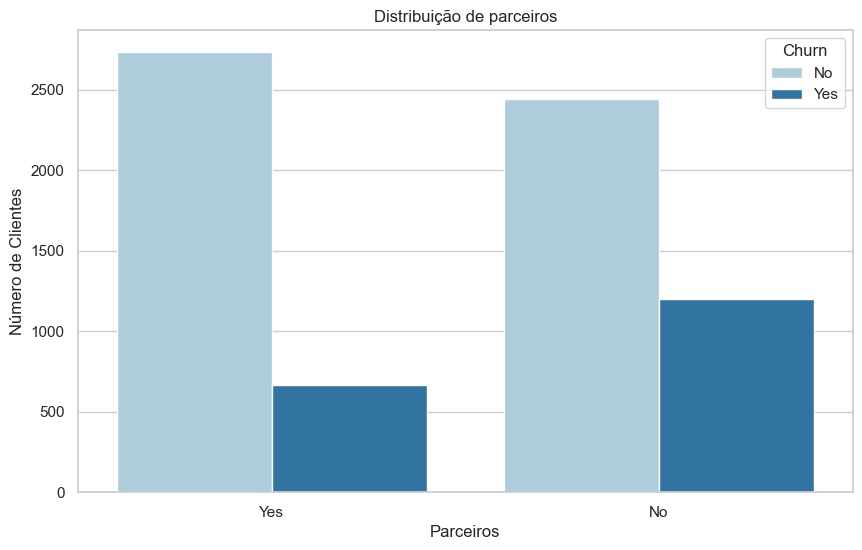

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Partner', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de parceiros')
plt.xlabel('Parceiros')
plt.ylabel('Número de Clientes')
plt.show()

Os clientes com parceiros parecem ter uma taxa de churn menor comparada aos clientes sem parceiros. Isso pode indicar que clientes com suporte social (parceiros) têm mais probabilidade de manter o serviço.

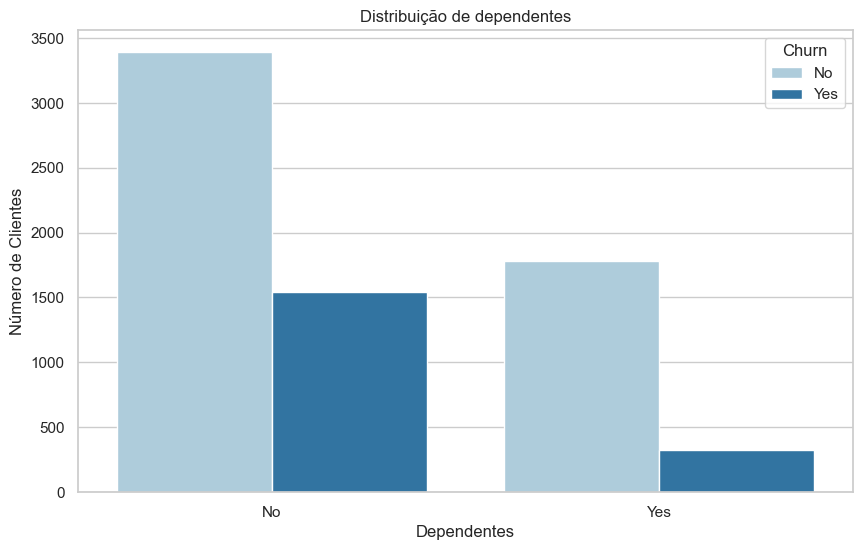

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Dependents', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Número de Clientes')
plt.show()

Os clientes com dependentes parecem ter uma taxa de churn consideravelmente menor comparada aos clientes sem dependentes. Isso pode indicar que clientes com dependentes são mais estáveis e têm mais probabilidade de manter o serviço. Porém a proporção de clientes sem dependentes é maior, então a empresa pode querer focar em estratégias para manter esses clientes.

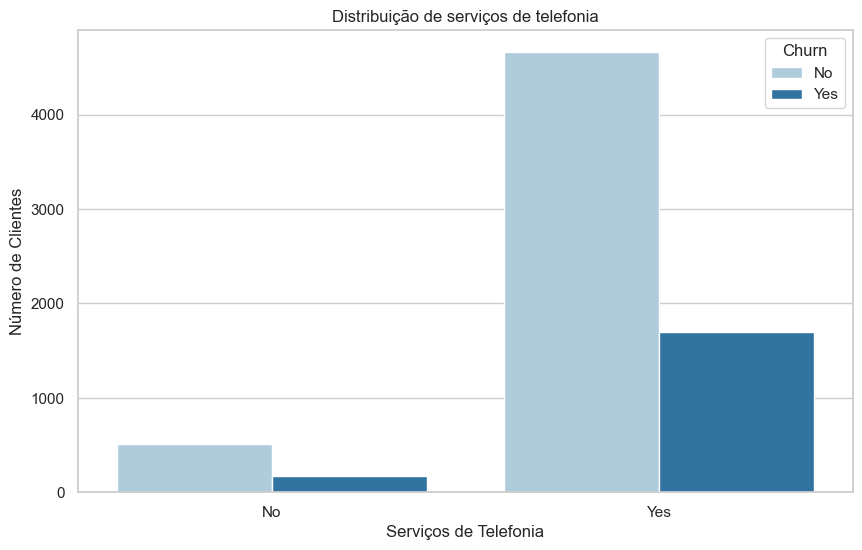

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PhoneService', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de serviços de telefonia')
plt.xlabel('Serviços de Telefonia')
plt.ylabel('Número de Clientes')
plt.show()

A maior parte dos clientes possui serviços de telefonia, e embora a taxa de churn seja menor, ainda é significativa. Isso pode indicar que os serviços de telefonia são essenciais para muitos clientes, mas há espaço para melhorar a retenção.

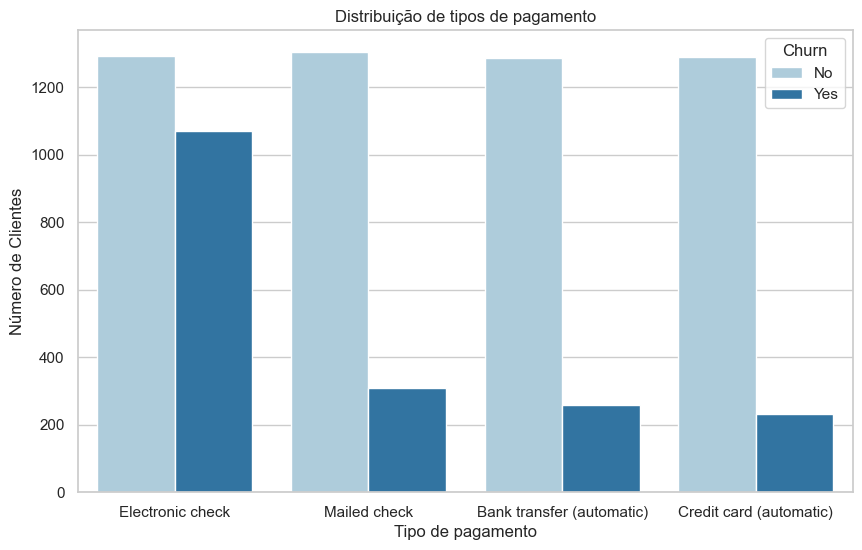

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de tipos de pagamento')
plt.xlabel('Tipo de pagamento')
plt.ylabel('Número de Clientes')
plt.show()

O método de pagamento Electronic check tem uma taxa de churn significativamente alta comparada aos outros métodos de pagamento. Isso pode sugerir que clientes que escolhem este método de pagamento estão mais propensos a cancelar seus serviços.

Os métodos de pagamento automáticos, como Bank transfer (automatic) e Credit card (automatic), têm taxas de churn mais baixas. Isso indica que a automação nos pagamentos pode estar correlacionada com maior retenção de clientes.

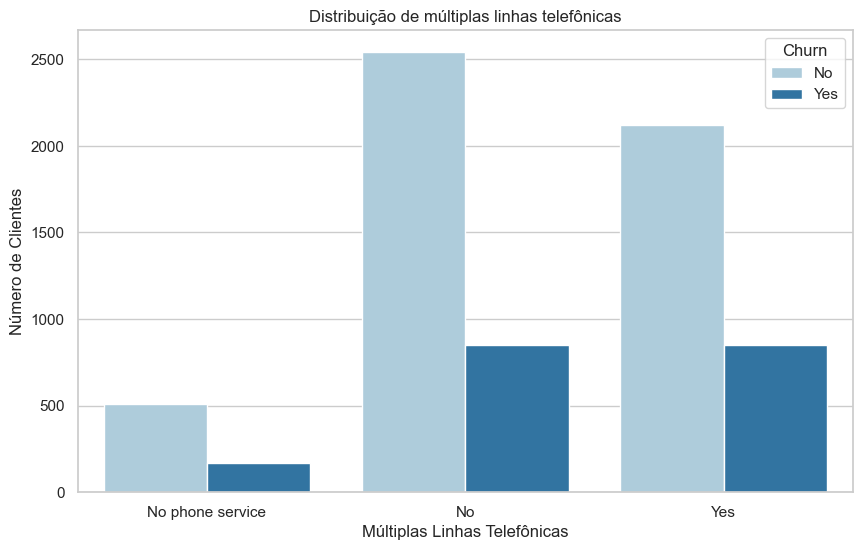

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MultipleLines', data=dataset,palette='Paired', hue='Churn')
plt.title('Distribuição de múltiplas linhas telefônicas')
plt.xlabel('Múltiplas Linhas Telefônicas')
plt.ylabel('Número de Clientes')
plt.show()

A baixa taxa de churn entre clientes sem serviço de telefonia pode indicar que esses clientes estão satisfeitos com outros serviços oferecidos pela empresa, como internet ou TV a cabo.

A taxa de churn é semelhante entre clientes com uma linha e clientes com múltiplas linhas telefônicas, sugerindo que a presença de múltiplas linhas não afeta significativamente a decisão de cancelar o serviço.